<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/%ED%96%89%EC%82%AC%20%EC%B0%B8%EC%97%AC%20%EC%9D%B8%EC%9B%90%20%EC%98%88%EC%B8%A1%EC%9D%84%20%ED%86%B5%ED%95%9C%20%EC%95%88%EC%A0%84%20%EA%B4%80%EB%A6%AC%20%EC%BB%A8%EC%84%A4%ED%8C%85%20%EC%84%9C%EB%B9%84%EC%8A%A4/0724%20%ED%96%89%EC%82%AC%20%EC%9D%B8%EC%9B%90%20%EC%98%88%EC%B8%A1%20%EB%AA%A8%EB%8D%B8%20%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DAB/Model /공연정보2.csv', encoding = 'cp949')
df = df.fillna(' ')

In [ ]:
df

,Unnamed: 0,이름,세부장르,일시,장소,출연,Staff,행사 종류
0,0,모차르트!,라이선스,2023.06.15 ~ 2023.08.22,세종문화회관 대극장,"이해준, 수호, 유회승, 김희재, 선민, 허혜진, 황우림, 민영기, 길병민, 서범석...",,뮤지컬
1,1,시카고,오리지널,2023.05.27 ~ 2023.08.06,블루스퀘어 신한카드홀,,,뮤지컬
2,4,할란카운티,창작,2023.05.16 ~ 2023.07.16,한전아트센터,"류정한, 안재욱, 이건명, 임태경, 이홍기, 박장현, 이병찬, 홍주찬, 김륜호, 안...",,뮤지컬
3,7,데스노트 - 대구,라이선스,2023.06.30 ~ 2023.07.16,대구 계명아트센터,"홍광호, 고은성, 김준수, 김성철, 이영미, 장은아, 서경수, 장지후, 류인아, 장...","송희진, 김동연",뮤지컬
4,8,와일드 그레이,창작,2023.06.08 ~ 2023.09.03,아트원씨어터 1관,"정민, 박민성, 김경수, 정휘, 정재환, 김리현, 윤석호, 기세중, 안지환, 김지훈",,뮤지컬
...,...,...,...,...,...,...,...,...
109565,62,Rain Man,웨스트엔드,2008.08.28 ~ 2008.12.20,Apollo Theatre,,,해외연극
109566,63,The Tempest(Revival),브로드웨이,2008.09.18 ~ 2008.10.12,Classic Stage Company,,윌리엄 셰익스피어,해외연극
109567,64,Brief Encounter,웨스트엔드,2008.02.17 ~ 2009.07.26,Cinema Haymarket,,노엘 코워드,해외연극
109568,65,Twelfth Night(Revival),웨스트엔드,2008.12.10 ~ 2009.03.07,Wyndham's,,윌리엄 셰익스피어,해외연극


In [ ]:
def get_months_in_range(date_range):
    start_date, end_date = date_range.split(' ~ ')
    start_year, start_month, _ = map(int, start_date.split('.'))
    end_year, end_month, _ = map(int, end_date.split('.'))

    months = []
    current_year = start_year
    current_month = start_month

    while current_year < end_year or (current_year == end_year and current_month <= end_month):
        month_name = str(current_month) + '월'
        months.append(month_name)

        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1

    return months

In [ ]:
df['년도'] = 0
for i in range(len(df)):
  df['년도'].iloc[i] = df['일시'].iloc[i][0:4] + '년'

<ipython-input-6-fed1ca671a4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['년도'].iloc[i] = df['일시'].iloc[i][0:4] + '년'


In [ ]:
df['월'] = 0
for i in range(len(df)):
    try:
      months_in_range = get_months_in_range(df['일시'].iloc[i])
      df['월'].iloc[i] = months_in_range
      df['월'].iloc[i] = ', '.join(df['월'].iloc[i])
    except: continue

<ipython-input-7-b1e9561dbbb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['월'].iloc[i] = months_in_range


In [ ]:
df['월'] = df['월'].astype(str)
df['텍스트'] = 0
df['텍스트'] = df['이름'] + ' ' + df['세부장르'] + ' ' + df['장소'] + ' ' + df['출연']  + ' ' + df['Staff'] + ' ' + df['년도'] + ' ' + df['월'] + df['행사 종류']

In [ ]:
df['인덱스'] = 0
for i in range(len(df)):
    df['인덱스'].iloc[i] = i

<ipython-input-9-d33237617c4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['인덱스'].iloc[i] = i


# Doc2vec

## 전처리

In [ ]:
!pip install --upgrade gensim

In [ ]:
from gensim.utils import simple_preprocess
import nltk
import re
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer

In [ ]:
df['텍스트'] = [item.replace(',', ' ') for item in df['텍스트']]
df['텍스트'] = [item.replace('/', ' ') for item in df['텍스트']]
df['텍스트'] = [item.replace('-', ' ') for item in df['텍스트']]
df['텍스트'] = [item.replace('(', ' ') for item in df['텍스트']]
df['텍스트'] = [item.replace(')', ' ') for item in df['텍스트']]
df['텍스트'] = [item.replace('&', ' ') for item in df['텍스트']]
df['텍스트'] = [item.replace('!', ' ') for item in df['텍스트']]

In [ ]:
for i in range(len(df)):
    # 공백을 기준으로 문장을 단어로 분리하여 리스트로 만듭니다
    words = re.split(r'\s+', df['텍스트'].iloc[i].strip())
    df['텍스트'].iloc[i] = words

<ipython-input-13-dc8840a4d8e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['텍스트'].iloc[i] = words


In [ ]:
doc_df = df[['인덱스','텍스트']].values.tolist()
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]

In [ ]:
doc_df

[[0,
  ['모차르트',
   '라이선스',
   '세종문화회관',
   '대극장',
   '이해준',
   '수호',
   '유회승',
   '김희재',
   '선민',
   '허혜진',
   '황우림',
   '민영기',
   '길병민',
   '서범석',
   '홍경수',
   '최지이',
   '윤지인',
   '전수미',
   '김소향',
   '배다해',
   '주아',
   '최나래',
   '육현욱',
   '정원영',
   '2023년',
   '6월',
   '7월',
   '8월뮤지컬']],
 [1, ['시카고', '오리지널', '블루스퀘어', '신한카드홀', '2023년', '5월', '6월', '7월', '8월뮤지컬']],
 [2,
  ['할란카운티',
   '창작',
   '한전아트센터',
   '류정한',
   '안재욱',
   '이건명',
   '임태경',
   '이홍기',
   '박장현',
   '이병찬',
   '홍주찬',
   '김륜호',
   '안세하',
   '백주연',
   '정명은',
   '엄준식',
   '이재진',
   '강동우',
   '이윤하',
   '지수연',
   '강성진',
   '김상현',
   '최오식',
   '2023년',
   '5월',
   '6월',
   '7월뮤지컬']],
 [3,
  ['데스노트',
   '대구',
   '라이선스',
   '대구',
   '계명아트센터',
   '홍광호',
   '고은성',
   '김준수',
   '김성철',
   '이영미',
   '장은아',
   '서경수',
   '장지후',
   '류인아',
   '장민제',
   '김용수',
   '서범석',
   '송희진',
   '김동연',
   '2023년',
   '6월',
   '7월뮤지컬']],
 [4,
  ['와일드',
   '그레이',
   '창작',
   '아트원씨어터',
   '1관',
   '정민',
   '박민성',
   '김경수',
   '정휘',
   '정재환',
   '김리현',
  

## 모델 제작

In [ ]:
max_epochs = 90

model = Doc2Vec(
    dm_concat=1,
    window=15,
    vector_size=300,
    alpha=0.025,
    min_alpha=0.0001,
    min_count=2,
    dm=0,
    negative=5,
    seed=42,
    workers=8)

model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha = model.alpha*0.96
    print(model.alpha)

iteration 0


0.024
iteration 1


KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/DAB/Model /show.model')

# 모델 사용

In [ ]:
model2 = Doc2Vec.load('/content/drive/MyDrive/DAB/Model /show.model')

In [ ]:
import re
from gensim.models import Doc2Vec

model2.random.seed(42)

def get_sentence_vector(sentence):
    table = str.maketrans(',/-()[＂]&!', '          ')
    sentence = sentence.translate(table)
    words = re.split(r'\s+', sentence.strip())
    vector = model2.infer_vector(doc_words=words)

    return vector

In [ ]:
def makesimilar(index):
  similar_doc = model2.docvecs.most_similar(index)
  first_elements = [element[0] for element in similar_doc]
  score = [element[1] for element in similar_doc]
  Similar = pd.DataFrame(columns = ['이름', '세부장르', '일시', '장소', '출연', 'Staff', '년도', '월', '텍스트', '인덱스'])

  for element in first_elements:
   A = df[df['인덱스'] == element]
   Similar = pd.concat([Similar, A])
  Similar['유사도'] = score
  Similar = Similar[['이름', '행사 종류' ,'세부장르','일시','장소','출연','Staff','유사도']]
  print(df.iloc[index])
  return(Similar)

In [ ]:
def get_sentence_vector(sentence):
    table = str.maketrans(',/-()[＂]&!', '          ')
    sentence = sentence.translate(table)
    words = re.split(r'\s+', sentence.strip())
    vector = model2.infer_vector(words)
    return vector

In [ ]:
# 예시
sentence = "학회 바다와 함께하는 데이터 분석"
vector = get_sentence_vector(sentence)
print(vector)

[ 2.01471662e-03 -2.15169461e-03 -1.12649496e-03  6.96803210e-03
  7.53104279e-04 -1.66191114e-03 -8.23342521e-03  2.79199169e-03
  5.91992680e-03  8.13810900e-03  1.07337011e-03  1.63307413e-03
  1.82525581e-03 -4.95801307e-03 -1.43396191e-03 -3.69231612e-03
 -2.13578204e-03  2.34918273e-03 -3.95301031e-04  2.52856687e-03
 -3.34210787e-03  8.59272957e-04  4.51789005e-03  2.02867319e-03
  4.49124910e-03  2.03266065e-03 -3.11448728e-03 -4.85374173e-03
 -3.15307686e-03 -2.25076941e-03 -7.59562897e-03  2.25499625e-05
 -7.24075362e-03  1.40252069e-03  6.61546830e-03  5.74302068e-03
 -4.11542132e-03 -2.46780808e-04 -2.76551378e-04  6.18340867e-03
 -4.89258347e-03 -1.91696931e-03  8.81912932e-03  1.10661669e-03
  3.95884388e-04  2.46659596e-03  2.53702421e-03 -6.58484234e-04
  2.22789217e-03 -4.48641740e-03  4.14108363e-04  3.99761554e-03
  1.60399228e-04  2.44129472e-03  5.59724588e-03 -2.12595263e-03
  3.30831250e-03 -1.12361473e-03  3.59967875e-04  5.15640993e-03
 -6.31683227e-03 -4.42622

In [ ]:
makesimilar(69505)

Unnamed: 0                                                  638
이름                                                     스웨덴 커넥션Ⅰ
세부장르                                                       현대무용
일시                                      2018.06.15 ~ 2018.06.17
장소                                                  예술의전당 자유소극장
출연                                                          서보권
Staff                                                          
행사 종류                                                        무용
년도                                                        2018년
월                                                            6월
텍스트           [스웨덴, 커넥션Ⅰ, 현대무용, 예술의전당, 자유소극장, 서보권, 2018년, 6월무용]
인덱스                                                       69505
Name: 69505, dtype: object


<ipython-input-19-1df4070b0394>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_doc = model2.docvecs.most_similar(index)


,이름,행사 종류,세부장르,일시,장소,출연,Staff,유사도
69692,스텝업,무용,현대무용,2018.09.06 ~ 2018.09.09,예술의전당 자유소극장,국립현대무용단,,0.856294
69182,스웨덴 커넥션 II,무용,현대무용,2019.03.29 ~ 2019.03.31,예술의전당 자유소극장,서보권,,0.837187
69234,스텝업,무용,현대무용,2019.06.07 ~ 2019.06.16,예술의전당 자유소극장,국립현대무용단,,0.823808
71794,제15회 서울세계무용축제 - 한국 핀란드 커넥션Ⅰ,무용,현대무용,2012.10.13 ~ 2012.10.14,예술의전당 자유소극장,,,0.823060
69500,혼합,무용,현대무용,2018.05.18 ~ 2018.05.19,강동아트센터 소극장 드림,,안성수,0.808629
69590,스윙,무용,현대무용,2018.04.20 ~ 2018.04.22,예술의전당 CJ 토월극장,국립현대무용단,안성수,0.806899
71306,국립현대무용단 벽오금학,무용,현대무용,2013.04.05 ~ 2013.04.07,예술의전당 CJ 토월극장,,홍승엽,0.804140
69740,제21회 서울세계무용축제 - 미트칼 알즈가이르,무용,무용,2018.10.02 ~ 2018.10.02,예술의전당 자유소극장,,,0.801748
71795,제15회 서울세계무용축제 - 동유럽포커스Ⅱ,무용,현대무용,2012.10.11 ~ 2012.10.11,예술의전당 자유소극장,,,0.789435
71796,제15회 서울세계무용축제 - 동유럽포커스Ⅰ,무용,현대무용,2012.10.09 ~ 2012.10.09,예술의전당 자유소극장,,,0.787860


# 올림픽공원 예측

## 예측준비

### vector3 생성

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DAB/Model /Olympic_rent.csv', encoding = 'utf8')

In [ ]:
def get_months_in_range(date_range):
    start_date, end_date = date_range.split(' ~ ')
    start_year, start_month, _ = map(int, start_date.split('-'))
    end_year, end_month, _ = map(int, end_date.split('-'))

    months = []
    current_year = start_year
    current_month = start_month

    while current_year < end_year or (current_year == end_year and current_month <= end_month):
        month_name = str(current_month) + '월'
        months.append(month_name)

        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1

    return months

In [ ]:
from scipy.stats import t

def calculate_prediction_interval(data, alpha):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)

    df = n - 1

    # Calculate critical value (two-tailed)
    t_critical = t.ppf(1 - alpha / 2, df)

    # Calculate standard error
    std_error = std_dev / np.sqrt(n)

    # Calculate margin of error
    margin_of_error = t_critical * std_error

    # Calculate lower and upper bounds
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound

confidence_level = 0.95

In [ ]:
df2 = df2[df2['EXCCLC_EVENT_NMPR_CO']>0]
df2 = df2[df2['REQST_EVENT_NMPR_CO']>0]
df2

,FCLTY_NM,EVENT_SDIV_NM,EVENT_NM,RENTLSPCE_BEGIN_DE,RENTLSPCE_END_DE,REQST_EVENT_NMPR_CO,EXCCLC_EVENT_NMPR_CO,ISE_ELSE_FLAG_NM,USE_DAY_CO
10,88잔디마당,공공행사,2009 강동학생과학축전,2009-05-16,2009-05-16,2000,2000,외부,1
11,몽촌해자수변무대A,공공행사,아가마중 음악회(태교음악),2009-05-30,2009-05-30,300,300,외부,1
14,올림픽수영장,체육행사,제27회 전국마스터즈 수영대회,2009-07-11,2009-07-12,1600,1600,내부,2
16,88호수수변무대,문화예술행사,더 뷰티플 싱어송라이터 시리즈 - 바우터 하멜 편,2009-08-27,2009-09-06,3500,2395,외부,11
20,한얼광장,문화예술행사,2009 시르크넛 한국투어공연,2009-11-15,2010-01-15,20000,14153,외부,62
...,...,...,...,...,...,...,...,...,...
1890,뮤즈라이브,문화예술행사,BoA콘서트,2023-03-06,2023-03-12,6000,4504,내부,7
1891,핸드볼경기장,문화예술행사,2023 윤하 앵콜 콘서트,2023-03-08,2023-03-12,8000,9493,내부,5
1892,KSPO DOME(체조경기장),문화예술행사,해리 스타일스 내한공연 (HARRY STYLES LIVE IN SEOUL),2023-03-13,2023-03-20,14000,15100,내부,8
1893,평화의광장,공공행사,2023 서울마라톤 겸 동아마라톤,2023-03-18,2023-03-19,10000,10000,외부,2


In [ ]:
df2['년도'] = 0
for i in range(len(df2)):
  df2['년도'].iloc[i] = df2['RENTLSPCE_BEGIN_DE'].iloc[i][0:4] + '년'

df2['일시'] = df2['RENTLSPCE_BEGIN_DE'] + ' ~ ' + df2['RENTLSPCE_END_DE']
df2['일시']

df2['월'] = 0
for i in range(len(df)):
    try:
      months_in_range = get_months_in_range(df2['일시'].iloc[i])
      df2['월'].iloc[i] = months_in_range
      df2['월'].iloc[i] = ', '.join(df2['월'].iloc[i])
    except: continue

<ipython-input-30-9bcdd66f12d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['년도'].iloc[i] = df2['RENTLSPCE_BEGIN_DE'].iloc[i][0:4] + '년'
<ipython-input-30-9bcdd66f12d6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['월'].iloc[i] = months_in_range


In [ ]:
df2['텍스트'] = df2['FCLTY_NM'] + ' ' + df2['EVENT_SDIV_NM'] + ' ' + df2['EVENT_NM'] + ' ' + df2['ISE_ELSE_FLAG_NM'] + ' ' + df2['년도'] + ' ' + df2['월']

In [ ]:
df2 = df2.reset_index(drop=True)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
model2.random.seed(42)

In [ ]:
def vector3(index,n):

  target_vector = get_sentence_vector(df2['텍스트'].iloc[index])

  df3 = df2[df2['RENTLSPCE_END_DE'] < df2['RENTLSPCE_BEGIN_DE'][index]]

  Vector = []
  for i in range(len(df3)):
     Vector.append(get_sentence_vector(df3['텍스트'].iloc[i]))

  similarities = cosine_similarity([target_vector], Vector)[0]

  most_similar_indices = np.argsort(similarities)[::-1][:n]

  return(df3.iloc[most_similar_indices])

### 예측함수

- makeprediction1: 평균사용

In [ ]:
def makeprediction1(index, a, b):
  data = []
  for i in range(a):
   vector2 = vector3(index,b)['EXCCLC_EVENT_NMPR_CO']
   data.append(vector2.mean())
  lower, upper = calculate_prediction_interval(data, confidence_level)
  return( (lower + upper)/2 )

In [ ]:
def calculate_mse1(i):
    try:
        actual = df2.iloc[i]['EXCCLC_EVENT_NMPR_CO']
        predict = makeprediction1(i, 15, 5)
        return (actual - predict) ** 2
    except:
        return 0

In [ ]:
import multiprocessing
from tqdm import tqdm

num_processes = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=num_processes)

mse_list = list(
    tqdm(
        pool.imap(calculate_mse1, range(len(df2))),
        total=len(df2),
        desc="Calculating MSE1",
    )
)

mse = sum(mse_list)
print(mse)

In [ ]:
mse/len(df2)
#mse = 496292746911.43994

# 예측함수


## 변수선택

y: 'EXCCLC_EVENT_NMPR_CO'에 영향 주는 변수 찾기

=> 회귀분석을 진행하여 변수 선택

#### 회귀분석 전처리
- df2의 공연장소, 내외부, 공연유형, 공연년도, 월 => 수치형으로

In [ ]:
df2["FCLTY_NM"].value_counts()

올림픽홀                492
KSPO DOME(체조경기장)    299
핸드볼경기장              281
우리금융아트홀             122
뮤즈라이브               114
K-아트홀                80
평화의광장                56
88잔디마당               51
88호수수변무대             43
올림픽컨벤션센터             29
핸드볼보조경기장             21
기타                   18
피크닉광장                18
한얼광장                 16
우리금융아트홀 연습실          16
벨로드롬                  8
몽촌해자수변무대A             7
올림픽수영장                7
만남의광장                 5
몽촌해자수변무대B             3
촬영                    1
Name: FCLTY_NM, dtype: int64

In [ ]:
# 공연장소
df2.loc[df2["FCLTY_NM"] == "올림픽홀","FCLTY_NM"] = 1
df2.loc[df2["FCLTY_NM"] == "KSPO DOME(체조경기장)","FCLTY_NM"] = 2
df2.loc[df2["FCLTY_NM"] == "핸드볼경기장","FCLTY_NM"] = 3
df2.loc[df2["FCLTY_NM"] == "우리금융아트홀","FCLTY_NM"] = 4
df2.loc[df2["FCLTY_NM"] == "뮤즈라이브","FCLTY_NM"] = 5
df2.loc[df2["FCLTY_NM"] == "K-아트홀","FCLTY_NM"] = 6
df2.loc[df2["FCLTY_NM"] == "평화의광장","FCLTY_NM"] = 7
df2.loc[df2["FCLTY_NM"] == "88잔디마당","FCLTY_NM"] = 8
df2.loc[df2["FCLTY_NM"] == "88호수수변무대","FCLTY_NM"] = 9
df2.loc[df2["FCLTY_NM"] == "올림픽컨벤션센터","FCLTY_NM"] = 10
df2.loc[df2["FCLTY_NM"] == "핸드볼보조경기장","FCLTY_NM"] = 11
df2.loc[df2["FCLTY_NM"] == "기타","FCLTY_NM"] = 12
df2.loc[df2["FCLTY_NM"] == "피크닉광장","FCLTY_NM"] = 13
df2.loc[df2["FCLTY_NM"] == "한얼광장","FCLTY_NM"] = 14
df2.loc[df2["FCLTY_NM"] == "우리금융아트홀 연습실","FCLTY_NM"] = 15
df2.loc[df2["FCLTY_NM"] == "벨로드롬","FCLTY_NM"] = 16
df2.loc[df2["FCLTY_NM"] == "몽촌해자수변무대A","FCLTY_NM"] = 17
df2.loc[df2["FCLTY_NM"] == "올림픽수영장","FCLTY_NM"] = 18
df2.loc[df2["FCLTY_NM"] == "만남의광장","FCLTY_NM"] = 19
df2.loc[df2["FCLTY_NM"] == "몽촌해자수변무대B","FCLTY_NM"] = 20
df2.loc[df2["FCLTY_NM"] == "촬영","FCLTY_NM"] = 21

In [ ]:
# 문화예술행사 (1), 대중공연 (2), 체육행사 (3), 공공행사 (4), 순수예술공연 (5) (dummy variable)
df2.loc[df2["EVENT_SDIV_NM"] == "문화예술행사","EVENT_SDIV_NM"] = 1
df2.loc[df2["EVENT_SDIV_NM"] == "대중공연","EVENT_SDIV_NM"] = 2
df2.loc[df2["EVENT_SDIV_NM"] == "체육행사","EVENT_SDIV_NM"] = 3
df2.loc[df2["EVENT_SDIV_NM"] == "공공행사","EVENT_SDIV_NM"] = 4
df2.loc[df2["EVENT_SDIV_NM"] == "순수예술공연","EVENT_SDIV_NM"] = 5

In [ ]:
# 내부 (0), 외부 (1)로 코딩 (dummy variable)
df2.loc[df2["ISE_ELSE_FLAG_NM"] == "내부","ISE_ELSE_FLAG_NM"] = 0
df2.loc[df2["ISE_ELSE_FLAG_NM"] == "외부","ISE_ELSE_FLAG_NM"] = 1

In [ ]:
# 년도에서 숫자만 출력
df2['년도'] = df2['년도'].str.extract(r'(\d+)')

In [ ]:
# 월에서 숫자만 출력
df2['월'] = df2['월'].str.extract(r'(\d+)')

In [ ]:
df2 = df2.astype({'FCLTY_NM':'int','EVENT_SDIV_NM':'int','ISE_ELSE_FLAG_NM':'int','년도':'int','월':'int'})

In [ ]:
#train & test set 분할
from sklearn.model_selection import train_test_split

y = df2['EXCCLC_EVENT_NMPR_CO']
X = df2.iloc[:,[0,1,5,7,8,9,11]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1180, 7) (507, 7) (1180,) (507,)


In [ ]:
train_set = X_train.copy()
train_set["EXCCLC_EVENT_NMPR_CO"] = y_train

In [ ]:
train_set

,FCLTY_NM,EVENT_SDIV_NM,REQST_EVENT_NMPR_CO,ISE_ELSE_FLAG_NM,USE_DAY_CO,년도,월,EXCCLC_EVENT_NMPR_CO
462,2,1,29000,0,17,2014,4,29137
764,1,2,3500,0,2,2016,2,3000
538,3,4,1300,0,1,2014,11,1200
215,9,1,1000,1,4,2012,6,2057
1079,4,2,800,0,2,2018,3,688
...,...,...,...,...,...,...,...,...
715,7,4,2000,1,1,2015,10,2000
905,5,1,450,0,3,2016,12,340
1096,3,3,1000,0,4,2018,4,600
235,1,2,5400,0,4,2012,8,4200


#### model1

- y: 'EXCCLC_EVENT_NMPR_CO'
- X: 	'FCLTY_NM',	'EVENT_SDIV_NM',	'REQST_EVENT_NMPR_CO',	'ISE_ELSE_FLAG_NM',	'USE_DAY_CO'

(x 변수 다중공선성, dummy variable 고려 x)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
corr = X.corr(method = 'pearson')
corr #신청인원, 사용일수 외에는 범주형 변수이기에 상관관계를 논하기에 무리가 있음.

,FCLTY_NM,EVENT_SDIV_NM,REQST_EVENT_NMPR_CO,ISE_ELSE_FLAG_NM,USE_DAY_CO,년도,월
FCLTY_NM,1.000000,0.305766,0.035101,0.623287,0.088973,-0.002849,0.052721
EVENT_SDIV_NM,0.305766,1.000000,-0.035917,0.288861,-0.103908,-0.112817,0.015665
REQST_EVENT_NMPR_CO,0.035101,-0.035917,1.000000,0.091299,0.171814,-0.028120,0.011050
ISE_ELSE_FLAG_NM,0.623287,0.288861,0.091299,1.000000,-0.053116,-0.022870,0.076262
USE_DAY_CO,0.088973,-0.103908,0.171814,-0.053116,1.000000,-0.019921,-0.066020
년도,-0.002849,-0.112817,-0.028120,-0.022870,-0.019921,1.000000,-0.047312
월,0.052721,0.015665,0.011050,0.076262,-0.066020,-0.047312,1.000000


In [ ]:
# 독립변수들의 VIF 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,3.617375,FCLTY_NM
1,4.602291,EVENT_SDIV_NM
2,1.166826,REQST_EVENT_NMPR_CO
3,1.904663,ISE_ELSE_FLAG_NM
4,1.279254,USE_DAY_CO
5,9.688729,년도
6,5.618623,월


In [ ]:
lr1 = smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ C(FCLTY_NM)+REQST_EVENT_NMPR_CO', data= train_set)
model1 = lr1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     EXCCLC_EVENT_NMPR_CO   R-squared:                       0.703
Model:                              OLS   Adj. R-squared:                  0.698
Method:                   Least Squares   F-statistic:                     137.2
Date:                  Sat, 12 Aug 2023   Prob (F-statistic):          2.12e-288
Time:                          04:17:45   Log-Likelihood:                -12629.
No. Observations:                  1180   AIC:                         2.530e+04
Df Residuals:                      1159   BIC:                         2.541e+04
Df Model:                            20                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1046.5685    589.079      1.777      0.076    -109.211    2202.348
C(FCLTY_NM)[T.2]     4273.4465    981.834      4.353      0.000    2347.075    6199.818
C(FCLTY_NM)[T.3]      218.8884    976.648      0.224      0.823   -1697.307    2135.084
C(FCLTY_NM)[T.4]     1548.1174   1288.218      1.202      0.230    -979.382    4075.617
C(FCLTY_NM)[T.5]     -973.6935   1342.331     -0.725      0.468   -3607.364    1659.977
C(FCLTY_NM)[T.6]     -280.3073   1519.683     -0.184      0.854   -3261.946    2701.331
C(FCLTY_NM)[T.7]    -5020.1234   1766.221     -2.842      0.005   -8485.471   -1554.775
C(FCLTY_NM)[T.8]     3771.6627   2041.195      1.848      0.065    -233.188    7776.513
C(FCLTY_NM)[T.9]     -256.2178   2099.461     -0.122      0.903   -4375.388    3862.952
C(FCLTY_NM)[T.10]    -244.7602   2440.759     -0.100      0.920   -5033.561    4544.041
C(FCLTY_NM)[T.11]    -456.7487   2777.070     -0.164      0.869   -5905.395    4991.898
C(FCLTY_NM)[T.12]    -842.0838   3666.387     -0.230      0.818   -8035.582    6351.415
C(FCLTY_NM)[T.13]    -905.8820   2864.488     -0.316      0.752   -6526.044    4714.280
C(FCLTY_NM)[T.14]    3725.4009   3190.181      1.168      0.243   -2533.776    9984.577
C(FCLTY_NM)[T.15]   -1.182e+04   2969.935     -3.979      0.000   -1.76e+04   -5991.455
C(FCLTY_NM)[T.16]   -1025.5407   5460.629     -0.188      0.851   -1.17e+04    9688.285
C(FCLTY_NM)[T.17]    5.428e+04   5098.287     10.646      0.000    4.43e+04    6.43e+04
C(FCLTY_NM)[T.18]     577.0186   4471.228      0.129      0.897   -8195.589    9349.626
C(FCLTY_NM)[T.19]    3812.8036   6296.087      0.606      0.545   -8540.200    1.62e+04
C(FCLTY_NM)[T.20]    -694.4378   6295.981     -0.110      0.912    -1.3e+04    1.17e+04
REQST_EVENT_NMPR_CO     0.5931      0.014     43.814      0.000       0.567       0.620
==============================================================================
Omnibus:                      694.278   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4375906.071
Skew:                          -0.841   Prob(JB):                         0.00
Kurtosis:                     301.326   Cond. No.                     5.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
X_test.iloc[333,:]

FCLTY_NM                    7
EVENT_SDIV_NM               4
REQST_EVENT_NMPR_CO    570000
ISE_ELSE_FLAG_NM            1
USE_DAY_CO                 14
년도                       2019
월                           9
Name: 1389, dtype: int64

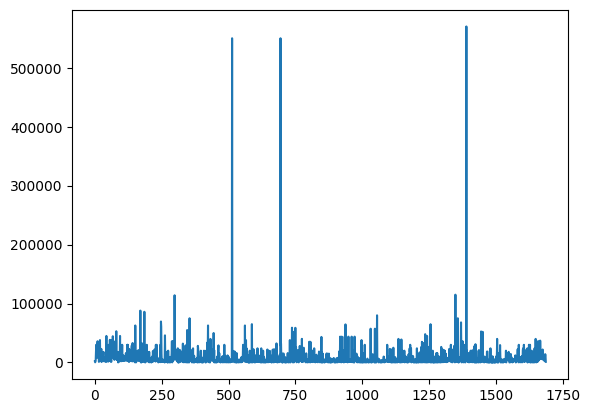

In [ ]:
plt.plot(df2['REQST_EVENT_NMPR_CO'])

In [ ]:
df2[df2['REQST_EVENT_NMPR_CO']>=100000]

,FCLTY_NM,EVENT_SDIV_NM,EVENT_NM,RENTLSPCE_BEGIN_DE,RENTLSPCE_END_DE,REQST_EVENT_NMPR_CO,EXCCLC_EVENT_NMPR_CO,ISE_ELSE_FLAG_NM,USE_DAY_CO,년도,일시,월,텍스트
298,10,1,"태권도 퍼포먼스 ""탈""",2013-01-21,2013-03-25,114000,14226,0,64,2013,2013-01-21 ~ 2013-03-25,1,"올림픽컨벤션센터 문화예술행사 태권도 퍼포먼스 ""탈"" 내부 2013년 1월, 2월, 3월"
513,17,4,제14회 한성백제문화제,2014-09-29,2014-10-06,550000,600000,1,8,2014,2014-09-29 ~ 2014-10-06,9,"몽촌해자수변무대A 공공행사 제14회 한성백제문화제 외부 2014년 9월, 10월"
694,7,4,제15회 한성백제문화제,2015-10-04,2015-10-12,550000,100000,1,9,2015,2015-10-04 ~ 2015-10-12,10,평화의광장 공공행사 제15회 한성백제문화제 외부 2015년 10월
1348,2,1,2019 박효신 20주년 콘서트,2019-06-24,2019-07-14,115000,101251,0,21,2019,2019-06-24 ~ 2019-07-14,6,KSPO DOME(체조경기장) 문화예술행사 2019 박효신 20주년 콘서트 내부 2...
1389,7,4,2019 한성백제문화제,2019-09-19,2019-10-02,570000,60000,1,14,2019,2019-09-19 ~ 2019-10-02,9,"평화의광장 공공행사 2019 한성백제문화제 외부 2019년 9월, 10월"


In [ ]:
df_out1 = df2[df2['REQST_EVENT_NMPR_CO']>=4*df2['EXCCLC_EVENT_NMPR_CO']] #54개

In [ ]:
df_out2 =df2[df2['REQST_EVENT_NMPR_CO']*4<df2['EXCCLC_EVENT_NMPR_CO']]

In [ ]:
df_out_total = pd.concat([df_out1,df_out2])
df_out_total = df_out_total.reset_index()[2:]

In [ ]:
df_out_total.to_csv("/content/drive/MyDrive/DAB/Model /out_total.csv", index = False)

신청인원과 정산인원의 차이가 큰 경우 제외

In [ ]:
df2_new =df2.copy()
df2_new = df2_new[df2_new['REQST_EVENT_NMPR_CO']<4*df2_new['EXCCLC_EVENT_NMPR_CO']]

In [ ]:
df2_new = df2_new[df2_new['REQST_EVENT_NMPR_CO']*4>df2_new['EXCCLC_EVENT_NMPR_CO']]

In [ ]:
df2_new.shape

(1598, 13)

train, test set 재설정

In [ ]:
y = df2_new['EXCCLC_EVENT_NMPR_CO']
X = df2_new.iloc[:,[0,1,5,7,8,9,11]]
X_train_new, X_test_new, y_train_new, y_test_new= train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [ ]:
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(1118, 7) (480, 7) (1118,) (480,)


In [ ]:
train_set_new = X_train_new.copy()
train_set_new["EXCCLC_EVENT_NMPR_CO"] = y_train_new
train_set_new

,FCLTY_NM,EVENT_SDIV_NM,REQST_EVENT_NMPR_CO,ISE_ELSE_FLAG_NM,USE_DAY_CO,년도,월,EXCCLC_EVENT_NMPR_CO
1385,5,1,150,0,1,2019,9,180
651,4,2,1000,0,3,2015,7,1525
611,2,1,13000,0,7,2015,4,11920
1439,3,1,8000,0,5,2019,12,7010
746,1,2,6700,0,5,2015,12,5850
...,...,...,...,...,...,...,...,...
736,1,2,3500,0,6,2015,12,9020
941,1,2,3000,0,2,2017,5,3636
1154,1,2,5000,0,3,2018,8,1710
242,1,2,3000,0,3,2012,9,5000


#### model2

- train_set_new 사용

In [ ]:
lr2 = smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ FCLTY_NM+EVENT_SDIV_NM+REQST_EVENT_NMPR_CO+ISE_ELSE_FLAG_NM+USE_DAY_CO+년도+월', data= train_set_new)
model2 = lr2.fit()
model2.summary()

# 이상치 제거 안 한 버전: smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ FCLTY_NM+EVENT_SDIV_NM+REQST_EVENT_NMPR_CO+ISE_ELSE_FLAG_NM+USE_DAY_CO+년도+월', data= train_set)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     EXCCLC_EVENT_NMPR_CO   R-squared:                       0.954
Model:                              OLS   Adj. R-squared:                  0.954
Method:                   Least Squares   F-statistic:                     3289.
Date:                  Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                          04:17:47   Log-Likelihood:                -10943.
No. Observations:                  1118   AIC:                         2.190e+04
Df Residuals:                      1110   BIC:                         2.194e+04
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.751e+04   7.78e+04     -0.225      0.822    -1.7e+05    1.35e+05
FCLTY_NM              108.4686     51.149      2.121      0.034       8.108     208.829
EVENT_SDIV_NM         370.6878    143.011      2.592      0.010      90.085     651.290
REQST_EVENT_NMPR_CO     1.0118      0.007    148.508      0.000       0.998       1.025
ISE_ELSE_FLAG_NM     -683.4970    538.736     -1.269      0.205   -1740.554     373.560
USE_DAY_CO            -38.6910      9.262     -4.177      0.000     -56.864     -20.518
년도                      8.0514     38.584      0.209      0.835     -67.653      83.756
월                     -59.1172     38.552     -1.533      0.125    -134.760      16.526
==============================================================================
Omnibus:                      605.903   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39910.404
Skew:                          -1.673   Prob(JB):                         0.00
Kurtosis:                      32.079   Cond. No.                     1.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lr2 =smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ FCLTY_NM+EVENT_SDIV_NM+REQST_EVENT_NMPR_CO+ISE_ELSE_FLAG_NM+USE_DAY_CO+년도+월', data= train_set)
model2 = lr2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     EXCCLC_EVENT_NMPR_CO   R-squared:                       0.661
Model:                              OLS   Adj. R-squared:                  0.659
Method:                   Least Squares   F-statistic:                     326.6
Date:                  Sat, 12 Aug 2023   Prob (F-statistic):          3.98e-270
Time:                          04:17:48   Log-Likelihood:                -12707.
No. Observations:                  1180   AIC:                         2.543e+04
Df Residuals:                      1172   BIC:                         2.547e+04
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.436e+05   2.06e+05      0.697      0.486    -2.6e+05    5.47e+05
FCLTY_NM              -20.2050    117.397     -0.172      0.863    -250.538     210.127
EVENT_SDIV_NM        -743.2034    350.498     -2.120      0.034   -1430.877     -55.530
REQST_EVENT_NMPR_CO     0.6354      0.014     46.541      0.000       0.609       0.662
ISE_ELSE_FLAG_NM     1051.2282   1300.161      0.809      0.419   -1499.675    3602.132
USE_DAY_CO              9.6843     23.370      0.414      0.679     -36.167      55.536
년도                    -69.9451    102.049     -0.685      0.493    -270.165     130.275
월                      23.0491    100.310      0.230      0.818    -173.759     219.857
==============================================================================
Omnibus:                      609.174   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7001669.046
Skew:                          -0.174   Prob(JB):                         0.00
Kurtosis:                     380.368   Cond. No.                     1.63e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

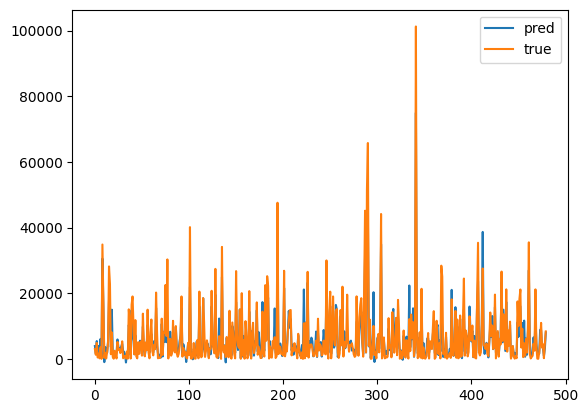

In [ ]:
plt.plot(np.array(model2.predict(X_test_new)),label = "pred")
plt.plot(np.array(y_test_new),label = "true")
plt.legend()
plt.show()

#### model3

In [ ]:
lr3 = smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ FCLTY_NM+EVENT_SDIV_NM+REQST_EVENT_NMPR_CO+USE_DAY_CO', data= train_set_new)
model3 = lr3.fit()
model3.summary()

# 이상치 제거 안 한 버전: smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ FCLTY_NM+EVENT_SDIV_NM+REQST_EVENT_NMPR_CO+USE_DAY_CO', data= train_set)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     EXCCLC_EVENT_NMPR_CO   R-squared:                       0.954
Model:                              OLS   Adj. R-squared:                  0.954
Method:                   Least Squares   F-statistic:                     5749.
Date:                  Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                          04:17:49   Log-Likelihood:                -10945.
No. Observations:                  1118   AIC:                         2.190e+04
Df Residuals:                      1113   BIC:                         2.193e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1582.9024    284.845     -5.557      0.000   -2141.796   -1024.009
FCLTY_NM               62.3521     39.386      1.583      0.114     -14.928     139.632
EVENT_SDIV_NM         345.3942    140.525      2.458      0.014      69.670     621.118
REQST_EVENT_NMPR_CO     1.0109      0.007    148.949      0.000       0.998       1.024
USE_DAY_CO            -36.4933      9.194     -3.969      0.000     -54.533     -18.454
==============================================================================
Omnibus:                      599.656   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39967.237
Skew:                          -1.641   Prob(JB):                         0.00
Kurtosis:                      32.107   Cond. No.                     4.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### model4

In [ ]:
lr4 = smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ FCLTY_NM+EVENT_SDIV_NM+USE_DAY_CO', data= train_set_new)
model4 = lr4.fit()
model4.summary()

# 이상치 제거 안 한 버전: smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ FCLTY_NM+EVENT_SDIV_NM+USE_DAY_CO', data= train_set)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     EXCCLC_EVENT_NMPR_CO   R-squared:                       0.034
Model:                              OLS   Adj. R-squared:                  0.031
Method:                   Least Squares   F-statistic:                     12.90
Date:                  Sat, 12 Aug 2023   Prob (F-statistic):           2.76e-08
Time:                          04:17:49   Log-Likelihood:                -12645.
No. Observations:                  1118   AIC:                         2.530e+04
Df Residuals:                      1114   BIC:                         2.532e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7747.2555   1270.774      6.096      0.000    5253.874    1.02e+04
FCLTY_NM        441.2411    179.747      2.455      0.014      88.560     793.922
EVENT_SDIV_NM -1799.4133    639.272     -2.815      0.005   -3053.726    -545.100
USE_DAY_CO      206.1673     41.382      4.982      0.000     124.973     287.362
==============================================================================
Omnibus:                     2735.053   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23565155.578
Skew:                          24.016   Prob(JB):                         0.00
Kurtosis:                     712.622   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### model5

In [ ]:
## 신청인원이 너무 유의해서 다른 변수를 생략하는 등 조취를 취해도 R^2 등이 큰 차이 x
# 표준화

from sklearn.preprocessing import StandardScaler

In [ ]:
Xst = X_train_new.copy()

In [ ]:
scaler = StandardScaler()
Xst = scaler.fit_transform(Xst)

In [ ]:
pd.DataFrame(Xst)

,0,1,2,3,4,5,6
0,0.347223,-0.763119,-0.421028,-0.384505,-0.359389,0.868540,0.535799
1,0.066126,0.232408,-0.377513,-0.384505,-0.220431,-0.310965,-0.053791
2,-0.496068,-0.763119,0.236804,-0.384505,0.057485,-0.310965,-0.938175
3,-0.214971,-0.763119,-0.019162,-0.384505,-0.081473,0.868540,1.420183
4,-0.777165,0.232408,-0.085713,-0.384505,-0.081473,-0.310965,1.420183
...,...,...,...,...,...,...,...
1113,-0.777165,0.232408,-0.249531,-0.384505,-0.011994,-0.310965,1.420183
1114,-0.777165,0.232408,-0.275127,-0.384505,-0.289910,0.278787,-0.643380
1115,-0.777165,0.232408,-0.172741,-0.384505,-0.220431,0.573663,0.241004
1116,-0.777165,0.232408,-0.275127,-0.384505,-0.220431,-1.195594,0.535799


In [ ]:
import statsmodels.api as sm

In [ ]:
X_new = sm.add_constant(Xst, has_constant = "add")

In [ ]:
model5= sm.OLS(y_train_new,X_new)
lr5 = model5.fit()
lr5.summary()

# 표준화 의미 x

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     EXCCLC_EVENT_NMPR_CO   R-squared:                       0.954
Model:                              OLS   Adj. R-squared:                  0.954
Method:                   Least Squares   F-statistic:                     3289.
Date:                  Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                          04:17:49   Log-Likelihood:                -10943.
No. Observations:                  1118   AIC:                         2.190e+04
Df Residuals:                      1110   BIC:                         2.194e+04
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7502.2674    129.402     57.977      0.000    7248.368    7756.167
x1           385.8762    181.963      2.121      0.034      28.846     742.907
x2           372.3533    143.654      2.592      0.010      90.490     654.217
x3          1.976e+04    133.086    148.508      0.000    1.95e+04       2e+04
x4          -228.9579    180.466     -1.269      0.205    -583.051     125.135
x5          -556.8723    133.309     -4.177      0.000    -818.438    -295.307
x6            27.3045    130.847      0.209      0.835    -229.430     284.039
x7          -200.5369    130.776     -1.533      0.125    -457.133      56.059
==============================================================================
Omnibus:                      605.903   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39910.404
Skew:                          -1.673   Prob(JB):                         0.00
Kurtosis:                      32.079   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## makeprediction2

- y: 'EXCCLC_EVENT_NMPR_CO'
- x: 공연 장소, 공연 유형, 신청인원, 사용일수 + vector3
(df2_pred)


#### vector3_col 제작

In [ ]:
vector3_col = []
for i in range(1,201):
   vector2 = int(vector3(i,1)['EXCCLC_EVENT_NMPR_CO'])
   vector3_col.append(vector2)

In [ ]:
for i in range(201,401):
   vector2 = int(vector3(i,1)['EXCCLC_EVENT_NMPR_CO'])
   vector3_col.append(vector2)

In [ ]:
for i in range(401,601):
   vector2 = int(vector3(i,1)['EXCCLC_EVENT_NMPR_CO'])
   vector3_col.append(vector2)

In [ ]:
for i in range(601,801):
   vector2 = int(vector3(i,1)['EXCCLC_EVENT_NMPR_CO'])
   vector3_col.append(vector2)

In [ ]:
for i in range(801,1001):
   vector2 = int(vector3(i,1)['EXCCLC_EVENT_NMPR_CO'])
   vector3_col.append(vector2)

In [ ]:
for i in range(1001,1201):
   vector2 = int(vector3(i,1)['EXCCLC_EVENT_NMPR_CO'])
   vector3_col.append(vector2)

In [ ]:
for i in range(1201,1401):
   vector2 = int(vector3(i,1)['EXCCLC_EVENT_NMPR_CO'])
   vector3_col.append(vector2)

In [ ]:
for i in range(1401,1687):
   vector2 = int(vector3(i,1)['EXCCLC_EVENT_NMPR_CO'])
   vector3_col.append(vector2)

In [ ]:
len(vector3_col)

In [ ]:
vector3_col = pd.DataFrame(vector3_col,columns = ['vector3_col'])

In [ ]:
vector3_col

In [ ]:
vector3_col.to_csv("/content/drive/MyDrive/DAB/Model /vector3_col.csv", index = False)

#### makeprediction2 생성

In [ ]:
vector3_col= pd.read_csv('/content/drive/MyDrive/DAB/Model /vector3_col.csv')

In [ ]:
vector3_col

,vector3_col
0,2000
1,2000
2,2000
3,2000
4,2000
...,...
1681,7128
1682,7128
1683,6925
1684,9493


In [ ]:
df2_pred = df2.copy()

In [ ]:
df2_pred = df2_pred.iloc[:,[0,1,5,6,8]]
df2_pred

,FCLTY_NM,EVENT_SDIV_NM,REQST_EVENT_NMPR_CO,EXCCLC_EVENT_NMPR_CO,USE_DAY_CO
0,8,4,2000,2000,1
1,17,4,300,300,1
2,18,3,1600,1600,2
3,9,1,3500,2395,11
4,14,1,20000,14153,62
...,...,...,...,...,...
1682,5,1,6000,4504,7
1683,3,1,8000,9493,5
1684,2,1,14000,15100,8
1685,7,4,10000,10000,2


In [ ]:
df2_pred = df2_pred.join(vector3_col,how='inner') #1687번째 행은 도출 x

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

##### 다중선형회귀

model_pred1

In [ ]:
# model_pred1 = smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ FCLTY_NM+EVENT_SDIV_NM+REQST_EVENT_NMPR_CO+USE_DAY_CO+vector3_col',data= df2_pred).fit()

model_pred1 = smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ C(FCLTY_NM)+EVENT_SDIV_NM+REQST_EVENT_NMPR_CO+USE_DAY_CO+vector3_col',data= df2_pred).fit()
model_pred1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     EXCCLC_EVENT_NMPR_CO   R-squared:                       0.599
Model:                              OLS   Adj. R-squared:                  0.592
Method:                   Least Squares   F-statistic:                     91.64
Date:                  Sat, 12 Aug 2023   Prob (F-statistic):          5.24e-305
Time:                          04:18:10   Log-Likelihood:                -18097.
No. Observations:                  1686   AIC:                         3.625e+04
Df Residuals:                      1658   BIC:                         3.640e+04
Df Model:                            27                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2269.3946    800.429      2.835      0.005     699.436    3839.353
C(FCLTY_NM)[T.2]       6303.4931    995.584      6.331      0.000    4350.758    8256.228
C(FCLTY_NM)[T.3]       1095.6198   1083.983      1.011      0.312   -1030.501    3221.740
C(FCLTY_NM)[T.4]       1350.9164   1178.611      1.146      0.252    -960.807    3662.640
C(FCLTY_NM)[T.5]      -2170.8951   1282.999     -1.692      0.091   -4687.365     345.575
C(FCLTY_NM)[T.6]      -1609.1813   1444.022     -1.114      0.265   -4441.480    1223.117
C(FCLTY_NM)[T.7]      -3982.9669   2186.728     -1.821      0.069   -8272.007     306.073
C(FCLTY_NM)[T.8]       4164.6895   1732.577      2.404      0.016     766.420    7562.959
C(FCLTY_NM)[T.9]       -454.0157   1861.397     -0.244      0.807   -4104.952    3196.921
C(FCLTY_NM)[T.10]     -2644.5440   2158.183     -1.225      0.221   -6877.595    1588.507
C(FCLTY_NM)[T.11]      1112.1675   2740.404      0.406      0.685   -4262.849    6487.184
C(FCLTY_NM)[T.12]      1439.1709   3103.809      0.464      0.643   -4648.627    7526.968
C(FCLTY_NM)[T.13]       486.4071   3142.636      0.155      0.877   -5677.546    6650.361
C(FCLTY_NM)[T.14]      5655.4461   2922.958      1.935      0.053     -77.631    1.14e+04
C(FCLTY_NM)[T.15]     -1.168e+04   3001.387     -3.892      0.000   -1.76e+04   -5794.160
C(FCLTY_NM)[T.16]      1474.2326   4193.964      0.352      0.725   -6751.791    9700.256
C(FCLTY_NM)[T.17]      5.675e+04   4541.977     12.494      0.000    4.78e+04    6.57e+04
C(FCLTY_NM)[T.18]      3268.8214   4453.332      0.734      0.463   -5465.925     1.2e+04
C(FCLTY_NM)[T.19]      4238.6151   5289.855      0.801      0.423   -6136.885    1.46e+04
C(FCLTY_NM)[T.20]       756.0760   6684.466      0.113      0.910   -1.24e+04    1.39e+04
C(FCLTY_NM)[T.21]       264.5709   1.13e+04      0.023      0.981   -2.19e+04    2.25e+04
C(EVENT_SDIV_NM)[T.2]  -733.3232    849.654     -0.863      0.388   -2399.830     933.184
C(EVENT_SDIV_NM)[T.3] -3779.9189   1206.957     -3.132      0.002   -6147.239   -1412.599
C(EVENT_SDIV_NM)[T.4] -2554.3097   1548.917     -1.649      0.099   -5592.350     483.731
C(EVENT_SDIV_NM)[T.5]  -288.6495   2791.199     -0.103      0.918   -5763.296    5185.997
REQST_EVENT_NMPR_CO       0.4372      0.011     38.651      0.000       0.415       0.459
USE_DAY_CO               83.1197     22.212      3.742      0.000      39.553     126.686
vector3_col              -0.0162      0.027     -0.591      0.555      -0.070       0.038
==============================================================================
Omnibus:                     2530.022   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10584794.671
Skew:                           7.

In [ ]:
x_cols = ["FCLTY_NM","EVENT_SDIV_NM","REQST_EVENT_NMPR_CO","USE_DAY_CO","vector3_col"]

In [ ]:
def makeprediction2(index,df):
  result = model_pred1.predict(df.loc[index,x_cols])
  return int(result)

In [ ]:
makeprediction2(2,df2_pred)

2591

In [ ]:
model_pred1.predict(df2_pred[x_cols])

0        4804.744444
1       56646.272099
2        2591.526038
3        4227.274491
4       21788.852878
            ...     
1681     4635.303203
1682     3187.584409
1683     7165.458119
1684    15203.932355
1685      217.643826
Length: 1686, dtype: float64

In [ ]:
pd.DataFrame([df2_pred["EXCCLC_EVENT_NMPR_CO"],model_pred1.predict(df2_pred[x_cols])],index=["EXCCLC_EVENT_NMPR_CO","makeprediction2"]).transpose()

,EXCCLC_EVENT_NMPR_CO,makeprediction2
0,2000.0,4804.744444
1,300.0,56646.272099
2,1600.0,2591.526038
3,2395.0,4227.274491
4,14153.0,21788.852878
...,...,...
1681,3219.0,4635.303203
1682,4504.0,3187.584409
1683,9493.0,7165.458119
1684,15100.0,15203.932355


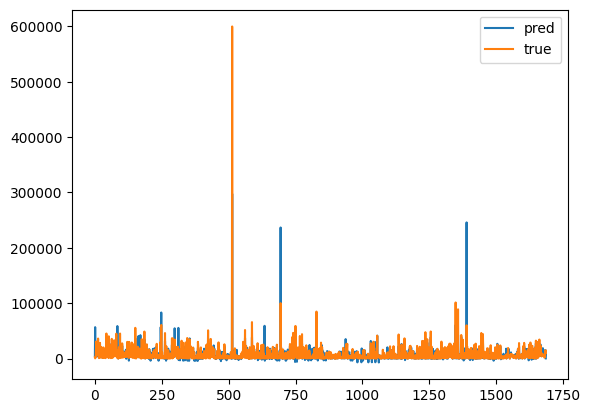

In [ ]:
plt.plot(np.array(model_pred1.predict(df2_pred[x_cols])),label = "pred")
plt.plot(np.array(df2_pred["EXCCLC_EVENT_NMPR_CO"]),label = "true")
plt.legend()
plt.show()

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(df2_pred["EXCCLC_EVENT_NMPR_CO"], model_pred1.predict(df2_pred[x_cols]))

# makeprediction1의 mse: 496292746911.43994

123214374.71649644

공연장소별 정산인원 평균- 3개정도로 줄이기 > makeprediction2 적용해보기

- 공연장소  올림픽홀 (1),KSPO DOME(체조경기장) (2), 핸드볼경기장 (3),우리금융아트홀 (4),뮤즈라이브 (5), K-아트홀 (6), 평화의광장 (7), 88잔디마당 (8), 88호수수변무대 (9), 올림픽컨벤션센터 (10), 핸드볼보조경기장 (11), 기타 (12), 피크닉광장 (13), 한얼광장 (14), 우리금융아트홀 연습실 (15), 벨로드롬 (16), 몽촌해자수변무대A (17), 만남의광장 (19), 몽촌해자수변무대B (20), 촬영 (21)

In [ ]:
df2_pred.groupby(['FCLTY_NM'], as_index=False).mean()["EXCCLC_EVENT_NMPR_CO"].sort_values(ascending = False)

# 10000명, 5000명, 1000명을 기준선으로 적용
# 1 (16,1,7,13)/ 2 (3,6,18,2)/ 3 (0,8,11,17,14,9,19,10,5)/ 4 (12,4,20,15)

16    95294.285714
1     16847.852843
7     13672.294118
13    12923.437500
3      9655.950413
6      7064.321429
18     6824.000000
2      5039.177936
0      4069.770325
8      3585.604651
11     3204.444444
17     2700.000000
14     2685.125000
9      2361.034483
19     1633.333333
10     1631.285714
5      1539.500000
12      474.555556
4       396.438596
20      100.000000
15       57.625000
Name: EXCCLC_EVENT_NMPR_CO, dtype: float64

In [ ]:
df2_pred_new = df2_pred.copy()

In [ ]:
df2_pred_new["FCLTY_NM_cluster"] = 0

In [ ]:
df2_pred_new.loc[(df2_pred_new["FCLTY_NM"]== 16) | (df2_pred_new["FCLTY_NM"]==1) | (df2_pred_new["FCLTY_NM"]==7) | (df2_pred_new["FCLTY_NM"]==13), "FCLTY_NM_cluster"]=1

In [ ]:
df2_pred_new.loc[(df2_pred_new["FCLTY_NM"]== 3) | (df2_pred_new["FCLTY_NM"]==6) | (df2_pred_new["FCLTY_NM"]==18) | (df2_pred_new["FCLTY_NM"]==2),"FCLTY_NM_cluster"] = 2

In [ ]:
# 0,8,11,17,14,9,19,10,5
df2_pred_new.loc[(df2_pred_new["FCLTY_NM"]== 0) | (df2_pred_new["FCLTY_NM"]==8) | (df2_pred_new["FCLTY_NM"]==11) | (df2_pred_new["FCLTY_NM"]==17) | (df2_pred_new["FCLTY_NM"]==14) | (df2_pred_new["FCLTY_NM"]==9) | (df2_pred_new["FCLTY_NM"]==19)| (df2_pred_new["FCLTY_NM"]==10) | (df2_pred_new["FCLTY_NM"]==5),"FCLTY_NM_cluster"] = 3

In [ ]:
df2_pred_new.loc[(df2_pred_new["FCLTY_NM"]== 12) | (df2_pred_new["FCLTY_NM"]==4) | (df2_pred_new["FCLTY_NM"]==20) | (df2_pred_new["FCLTY_NM"]==15),"FCLTY_NM_cluster"] = 4

In [ ]:
df2_pred_new

,FCLTY_NM,EVENT_SDIV_NM,REQST_EVENT_NMPR_CO,EXCCLC_EVENT_NMPR_CO,USE_DAY_CO,vector3_col,FCLTY_NM_cluster
0,8,4,2000,2000,1,2000,3
1,17,4,300,300,1,2000,3
2,18,3,1600,1600,2,2000,2
3,9,1,3500,2395,11,2000,3
4,14,1,20000,14153,62,2000,3
...,...,...,...,...,...,...,...
1681,3,1,2600,3219,3,7128,2
1682,5,1,6000,4504,7,7128,3
1683,3,1,8000,9493,5,6925,2
1684,2,1,14000,15100,8,9493,2


In [ ]:
model_pred1_new = smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ C(FCLTY_NM_cluster)+EVENT_SDIV_NM+REQST_EVENT_NMPR_CO+USE_DAY_CO+vector3_col',data= df2_pred_new).fit()
model_pred1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     EXCCLC_EVENT_NMPR_CO   R-squared:                       0.537
Model:                              OLS   Adj. R-squared:                  0.535
Method:                   Least Squares   F-statistic:                     243.2
Date:                  Sat, 12 Aug 2023   Prob (F-statistic):          4.83e-274
Time:                          05:17:48   Log-Likelihood:                -18217.
No. Observations:                  1686   AIC:                         3.645e+04
Df Residuals:                      1677   BIC:                         3.650e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4072.8048    1.2e+04      0.339      0.735   -1.95e+04    2.76e+04
C(FCLTY_NM_cluster)[T.1] -1152.9809    1.2e+04     -0.096      0.923   -2.47e+04    2.23e+04
C(FCLTY_NM_cluster)[T.2]  1855.5245    1.2e+04      0.155      0.877   -2.16e+04    2.54e+04
C(FCLTY_NM_cluster)[T.3]   427.7435    1.2e+04      0.036      0.972   -2.31e+04     2.4e+04
C(FCLTY_NM_cluster)[T.4]  -638.7754    1.2e+04     -0.053      0.958   -2.42e+04    2.29e+04
EVENT_SDIV_NM            -1017.0339    292.319     -3.479      0.001   -1590.383    -443.685
REQST_EVENT_NMPR_CO          0.4800      0.011     42.015      0.000       0.458       0.502
USE_DAY_CO                  51.4817     22.895      2.249      0.025       6.576      96.388
vector3_col                 -0.0104      0.029     -0.356      0.722      -0.068       0.047
==============================================================================
Omnibus:                     2616.834   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14264279.081
Skew:                           8.452   Prob(JB):                         0.00
Kurtosis:                     453.294   Cond. No.                     2.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_cols_new = ["EVENT_SDIV_NM","REQST_EVENT_NMPR_CO","USE_DAY_CO","vector3_col","FCLTY_NM_cluster"]

In [ ]:
pd.DataFrame([df2_pred_new["EXCCLC_EVENT_NMPR_CO"],model_pred1_new.predict(df2_pred_new[x_cols_new])],index=["EXCCLC_EVENT_NMPR_CO","makeprediction2_new"]).transpose()

,EXCCLC_EVENT_NMPR_CO,makeprediction2_new
0,2000.0,1423.199999
1,300.0,607.132367
2,1600.0,3727.480598
3,2395.0,5709.178032
4,14153.0,16255.399300
...,...,...
1681,3219.0,6239.805537
1682,4504.0,6650.086514
1683,9493.0,8937.092248
1684,15100.0,11945.102230


model_pred2

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = df2_pred.loc[[0,1,2,4,5]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])]
vif["features"] = VIF.columns
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,FCLTY_NM
1,inf,EVENT_SDIV_NM
2,inf,REQST_EVENT_NMPR_CO
3,inf,EXCCLC_EVENT_NMPR_CO
4,inf,USE_DAY_CO
5,inf,vector3_col


makeprediction2_1

- dummy variable 고려했을 때, 예측에 유의한 영향을 주는 변수가 공연장소, 신청인원이었기에 타 변수들 지우고 시행

In [ ]:
model_pred2 = smf.ols(formula= 'EXCCLC_EVENT_NMPR_CO~ C(FCLTY_NM)+REQST_EVENT_NMPR_CO+vector3_col',data= df2_pred).fit()
model_pred2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     EXCCLC_EVENT_NMPR_CO   R-squared:                       0.592
Model:                              OLS   Adj. R-squared:                  0.587
Method:                   Least Squares   F-statistic:                     109.7
Date:                  Sat, 12 Aug 2023   Prob (F-statistic):          4.38e-304
Time:                          04:18:12   Log-Likelihood:                -18111.
No. Observations:                  1686   AIC:                         3.627e+04
Df Residuals:                      1663   BIC:                         3.639e+04
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1977.8932    557.299      3.549      0.000     884.812    3070.974
C(FCLTY_NM)[T.2]     6560.7134    842.232      7.790      0.000    4908.767    8212.660
C(FCLTY_NM)[T.3]      301.0408    843.198      0.357      0.721   -1352.800    1954.881
C(FCLTY_NM)[T.4]     2367.7516   1146.760      2.065      0.039     118.507    4616.997
C(FCLTY_NM)[T.5]    -1712.8992   1172.642     -1.461      0.144   -4012.909     587.111
C(FCLTY_NM)[T.6]    -1118.4923   1359.790     -0.823      0.411   -3785.573    1548.588
C(FCLTY_NM)[T.7]    -6057.6647   1605.652     -3.773      0.000   -9206.978   -2908.352
C(FCLTY_NM)[T.8]     4767.0682   1662.924      2.867      0.004    1505.423    8028.713
C(FCLTY_NM)[T.9]     -180.2416   1793.911     -0.100      0.920   -3698.803    3338.320
C(FCLTY_NM)[T.10]   -2209.3900   2154.095     -1.026      0.305   -6434.413    2015.633
C(FCLTY_NM)[T.11]   -1191.8449   2512.539     -0.474      0.635   -6119.918    3736.228
C(FCLTY_NM)[T.12]    -757.9935   2704.674     -0.280      0.779   -6062.917    4546.931
C(FCLTY_NM)[T.13]   -1687.1508   2707.764     -0.623      0.533   -6998.137    3623.835
C(FCLTY_NM)[T.14]    5862.9276   2864.673      2.047      0.041     244.183    1.15e+04
C(FCLTY_NM)[T.15]   -8143.2815   2868.211     -2.839      0.005   -1.38e+04   -2517.597
C(FCLTY_NM)[T.16]   -1875.5928   4017.547     -0.467      0.641   -9755.575    6004.390
C(FCLTY_NM)[T.17]    5.399e+04   4390.081     12.299      0.000    4.54e+04    6.26e+04
C(FCLTY_NM)[T.18]    -106.4686   4290.637     -0.025      0.980   -8522.087    8309.150
C(FCLTY_NM)[T.19]    2180.2495   5067.921      0.430      0.667   -7759.928    1.21e+04
C(FCLTY_NM)[T.20]   -1272.7733   6528.009     -0.195      0.845   -1.41e+04    1.15e+04
C(FCLTY_NM)[T.21]   -1918.4370   1.13e+04     -0.170      0.865   -2.41e+04    2.02e+04
REQST_EVENT_NMPR_CO     0.4475      0.011     39.974      0.000       0.425       0.469
vector3_col            -0.0105      0.028     -0.381      0.703      -0.065       0.044
==============================================================================
Omnibus:                     2376.472   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9304079.472
Skew:                           6.944   Prob(JB):                         0.00
Kurtosis:                     366.661   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def makeprediction2_1(index,df):
  result = model_pred2.predict(df.loc[index,x_cols])
  return int(result)

In [ ]:
model_pred2.predict(df2_pred[x_cols])

0        7618.856960
1       56082.649198
2        2566.339792
3        3342.723661
4       16768.834607
            ...     
1681     3367.439544
1682     2874.832996
1683     5785.807187
1684    14703.213565
1685      360.928770
Length: 1686, dtype: float64

In [ ]:
pd.DataFrame([df2_pred["EXCCLC_EVENT_NMPR_CO"],model_pred2.predict(df2_pred[x_cols])],index=["EXCCLC_EVENT_NMPR_CO","makeprediction2_1"]).transpose()

,EXCCLC_EVENT_NMPR_CO,makeprediction2_1
0,2000.0,7618.856960
1,300.0,56082.649198
2,1600.0,2566.339792
3,2395.0,3342.723661
4,14153.0,16768.834607
...,...,...
1681,3219.0,3367.439544
1682,4504.0,2874.832996
1683,9493.0,5785.807187
1684,15100.0,14703.213565


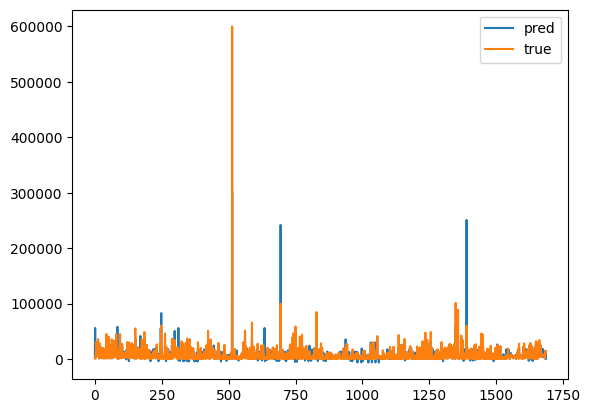

In [ ]:
plt.plot(np.array(model_pred2.predict(df2_pred[x_cols])),label = "pred")
plt.plot(np.array(df2_pred["EXCCLC_EVENT_NMPR_CO"]),label = "true")
plt.legend()
plt.show()

In [ ]:
mean_squared_error(df2_pred["EXCCLC_EVENT_NMPR_CO"], model_pred2.predict(df2_pred[x_cols]))

# makeprediction1의 mse: 496292746911.43994
# makeprediction2의 mse: 123533017.68286735

125290111.47039375

## makeprediction3 함수 생성

- 인공신경망 (ANN) 활용
- 데이터 df2_pred 활용: columns (공연장소, 행사유형, 신청인원, 사용일수, vector3_col)

### (공연장소, 행사유형, 신청인원, 사용일수, vector3_col) 버전 ANN

In [ ]:
# df2_pred
X_1 = df2_pred.iloc[:,[0,1,2,4,5]].values
y_1 = df2_pred["EXCCLC_EVENT_NMPR_CO"].values

In [ ]:
# 8:2로 test train set 나누기
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size = 0.2, shuffle=True)

# train_set 한 번 더 나누기
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1,y_train1, test_size = 0.2, shuffle=True)

Buiding ANN

In [ ]:
import tensorflow as tf

In [ ]:
ann1 = tf.keras.models.Sequential()

In [ ]:
ann1.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [ ]:
ann1.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann1.add(tf.keras.layers.Dense(units=1))

Training the ANN

In [ ]:
ann1.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['MeanSquaredLogarithmicError'])

In [ ]:
model_ann1 = ann1.fit(X_train1, y_train1, batch_size = 32, epochs = 25,validation_data=(X_val1, y_val1), shuffle=True)

Epoch 1/25
34/34 [==============================] - 4s 30ms/step - loss: 235027104.0000 - mean_squared_logarithmic_error: 64.4767 - val_loss: 168506048.0000 - val_mean_squared_logarithmic_error: 66.3420
Epoch 2/25
34/34 [==============================] - 0s 10ms/step - loss: 197330064.0000 - mean_squared_logarithmic_error: 64.4767 - val_loss: 149578096.0000 - val_mean_squared_logarithmic_error: 66.3420
Epoch 3/25
34/34 [==============================] - 0s 10ms/step - loss: 166716688.0000 - mean_squared_logarithmic_error: 62.7633 - val_loss: 136458512.0000 - val_mean_squared_logarithmic_error: 53.0137
Epoch 4/25
34/34 [==============================] - 0s 11ms/step - loss: 144760256.0000 - mean_squared_logarithmic_error: 43.9158 - val_loss: 121216496.0000 - val_mean_squared_logarithmic_error: 34.6266
Epoch 5/25
34/34 [==============================] - 0s 10ms/step - loss: 123992448.0000 - mean_squared_logarithmic_error: 32.0616 - val_loss: 108933592.0000 - val_mean_squared_logarithmic_

In [ ]:
# test set으로 예측 평가

y_pred1 = ann1.predict(X_test1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

11/11 [==============================] - 0s 3ms/step
[[7.23e+03 8.08e+03]
 [1.16e+04 8.57e+03]
 [9.89e+03 2.88e+04]
 [5.97e+03 1.80e+03]
 [1.97e+03 3.00e+03]
 [2.53e+03 2.86e+03]
 [2.26e+02 7.00e+01]
 [9.04e+01 1.28e+02]
 [5.98e+03 4.77e+03]
 [5.70e+02 1.20e+02]
 [9.58e+03 2.02e+04]
 [6.61e+03 1.44e+02]
 [2.59e+03 4.14e+03]
 [1.02e+04 2.98e+02]
 [8.41e+03 1.34e+04]
 [6.35e+03 2.22e+04]
 [4.46e+03 7.22e+03]
 [3.14e+03 4.78e+03]
 [1.05e+03 4.04e+03]
 [1.83e+03 1.50e+03]
 [2.34e+02 2.00e+02]
 [6.90e+03 2.65e+04]
 [2.00e+03 5.29e+02]
 [2.86e+03 9.00e+02]
 [1.84e+03 2.69e+03]
 [3.19e+03 1.00e+03]
 [2.07e+03 2.11e+03]
 [8.00e+03 1.39e+04]
 [1.56e+03 8.00e+02]
 [7.70e+02 5.00e+02]
 [1.75e+03 3.00e+03]
 [1.68e+04 4.31e+03]
 [3.50e+03 5.27e+03]
 [2.33e+03 1.50e+03]
 [3.62e+03 7.09e+03]
 [6.25e+02 4.38e+03]
 [2.02e+04 3.48e+04]
 [1.23e+04 1.10e+04]
 [3.27e+03 2.42e+03]
 [2.76e+03 8.50e+02]
 [4.07e+03 3.90e+03]
 [5.06e+03 6.22e+03]
 [1.72e+03 4.32e+03]
 [5.70e+02 1.00e+02]
 [4.17e+03 1.49e+04]
 [

In [ ]:
import sklearn.metrics

evs_no=sklearn.metrics.explained_variance_score(y_test1,ann1.predict(X_test1))
mse_no=sklearn.metrics.mean_squared_error(y_test1,ann1.predict(X_test1))
msle_no=sklearn.metrics.mean_squared_log_error(y_test1,ann1.predict(X_test1))
r2_no=sklearn.metrics.r2_score(y_test1,ann1.predict(X_test1))

11/11 [==============================] - 0s 4ms/step


In [ ]:
print('Explained Variance Score:',evs_no)
print('Mean Square Error       :',mse_no)
print('Mean Squared Log Error  :',msle_no)
print('R2 Score                :',r2_no)

Explained Variance Score: 0.4056456671960359
Mean Square Error       : 688333100.6524454
Mean Squared Log Error  : 1.2295538302777582
R2 Score                : 0.3906964127899911


dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])


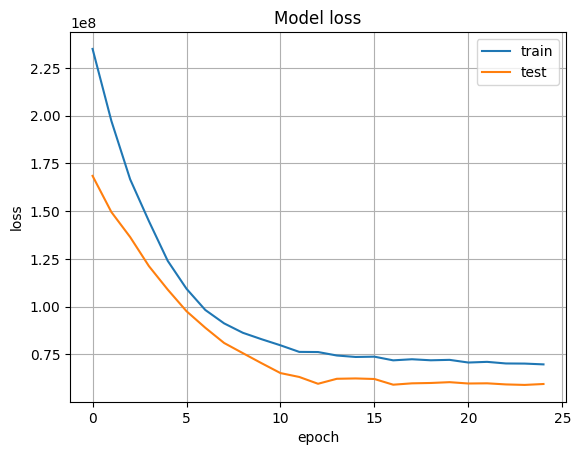

In [ ]:
# list all data in history
print(model_ann1.history.keys())
plt.plot(model_ann1.history['loss'])
plt.plot(model_ann1.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

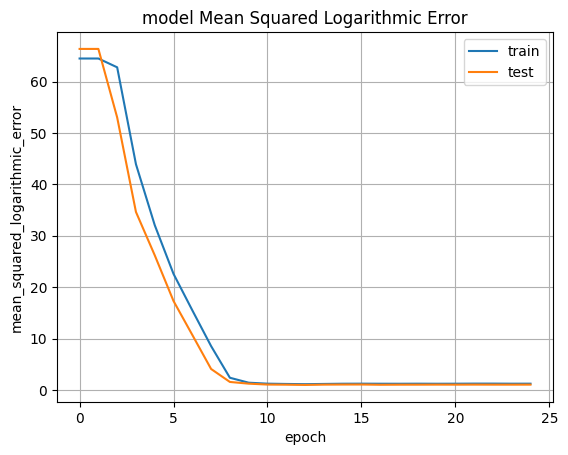

In [ ]:
# summarize history for loss
plt.plot(model_ann1.history['mean_squared_logarithmic_error'])
plt.plot(model_ann1.history['val_mean_squared_logarithmic_error'])
plt.grid()
plt.title('model Mean Squared Logarithmic Error')
plt.ylabel('mean_squared_logarithmic_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
pd.concat([pd.DataFrame(y_pred1),pd.DataFrame(y_test1)],axis=1)

,0,0
0,7227.473633,8077
1,11649.087891,8573
2,9885.883789,28849
3,5965.058594,1800
4,1974.879272,3000
...,...,...
333,2690.555420,400
334,6315.694824,11451
335,784.714661,720
336,22900.056641,35506


### (공연장소, 신청인원, vector3_col)

In [ ]:
# df2_pred
X_2 = df2_pred.iloc[:,[0,2]].values
y_2 = df2_pred["EXCCLC_EVENT_NMPR_CO"].values

In [ ]:
# 8:2로 test train set 나누기
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size = 0.2, shuffle=True)

# train_set 한 번 더 나누기
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2,y_train2, test_size = 0.2, shuffle=True)

In [ ]:
ann2 = tf.keras.models.Sequential()

In [ ]:
ann2.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [ ]:
ann2.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann2.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann2.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['MeanSquaredLogarithmicError'])

In [ ]:
model_ann2 = ann2.fit(X_train2, y_train2, batch_size = 32, epochs = 25,validation_data=(X_val2, y_val2), shuffle=True)

Epoch 1/25
34/34 [==============================] - 4s 26ms/step - loss: 577003200.0000 - mean_squared_logarithmic_error: 64.4612 - val_loss: 167748304.0000 - val_mean_squared_logarithmic_error: 67.1334
Epoch 2/25
34/34 [==============================] - 0s 9ms/step - loss: 558928640.0000 - mean_squared_logarithmic_error: 64.4592 - val_loss: 163718960.0000 - val_mean_squared_logarithmic_error: 67.1334
Epoch 3/25
34/34 [==============================] - 0s 9ms/step - loss: 544456704.0000 - mean_squared_logarithmic_error: 64.4560 - val_loss: 159225744.0000 - val_mean_squared_logarithmic_error: 67.1334
Epoch 4/25
34/34 [==============================] - 0s 9ms/step - loss: 528988896.0000 - mean_squared_logarithmic_error: 64.4533 - val_loss: 156032688.0000 - val_mean_squared_logarithmic_error: 67.1318
Epoch 5/25
34/34 [==============================] - 0s 9ms/step - loss: 516785600.0000 - mean_squared_logarithmic_error: 64.4475 - val_loss: 152261968.0000 - val_mean_squared_logarithmic_erro

In [ ]:
# test set으로 예측 평가

y_pred2 = ann2.predict(X_test2)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

11/11 [==============================] - 0s 7ms/step
[[1.16e+03 5.36e+03]
 [4.51e+03 1.62e+04]
 [2.60e+02 7.95e+02]
 [1.96e+02 7.50e+02]
 [2.60e+02 8.00e+02]
 [2.91e+01 1.65e+02]
 [7.75e+02 3.63e+03]
 [1.14e+02 4.25e+02]
 [1.42e+03 5.50e+03]
 [2.60e+02 9.03e+02]
 [1.65e+01 1.24e+02]
 [5.18e+02 2.00e+03]
 [7.49e+02 8.74e+03]
 [2.95e+01 1.00e+02]
 [2.78e+01 9.00e+01]
 [2.61e+02 1.00e+03]
 [3.60e+03 1.10e+04]
 [8.11e+01 3.00e+02]
 [7.76e+02 1.50e+03]
 [1.19e+03 3.45e+03]
 [2.32e+03 9.81e+03]
 [5.15e+03 2.45e+04]
 [2.61e+02 1.00e+03]
 [9.28e+03 3.67e+04]
 [2.45e+03 6.23e+03]
 [4.12e+03 1.43e+04]
 [6.67e+01 1.63e+02]
 [6.00e+01 2.40e+02]
 [1.73e+03 5.85e+03]
 [1.10e+03 3.45e+03]
 [7.75e+02 2.65e+03]
 [8.50e+03 2.66e+04]
 [5.47e+01 1.61e+02]
 [2.79e+02 1.07e+03]
 [2.71e+03 9.82e+03]
 [8.01e+01 3.00e+02]
 [2.01e+03 7.28e+03]
 [2.24e+03 9.27e+03]
 [5.18e+02 2.55e+03]
 [1.29e+03 3.00e+03]
 [1.55e+03 5.00e+03]
 [6.47e+02 2.50e+03]
 [9.94e+02 1.54e+03]
 [2.58e+03 1.15e+04]
 [4.19e+01 1.56e+02]
 [

In [ ]:
evs_no=sklearn.metrics.explained_variance_score(y_test2,ann2.predict(X_test2))
mse_no=sklearn.metrics.mean_squared_error(y_test2,ann2.predict(X_test2))
msle_no=sklearn.metrics.mean_squared_log_error(y_test2,ann2.predict(X_test2))
r2_no=sklearn.metrics.r2_score(y_test2,ann2.predict(X_test2))

11/11 [==============================] - 0s 4ms/step


In [ ]:
print('Explained Variance Score:',evs_no)
print('Mean Square Error       :',mse_no)
print('Mean Squared Log Error  :',msle_no)
print('R2 Score                :',r2_no)

Explained Variance Score: 0.44816702831866106
Mean Square Error       : 80559328.41616167
Mean Squared Log Error  : 1.9390289566663947
R2 Score                : 0.24182294018308625


dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])


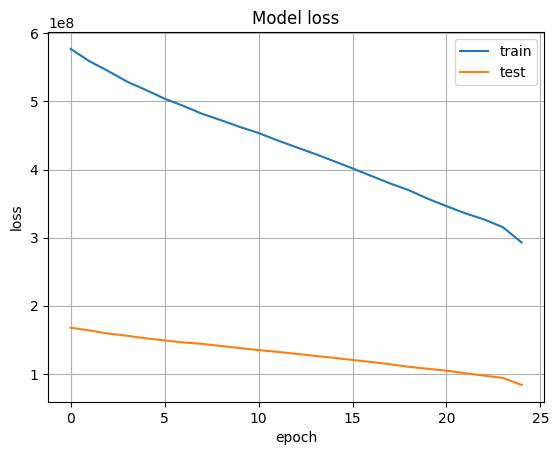

In [ ]:
# list all data in history
print(model_ann2.history.keys())
plt.plot(model_ann2.history['loss'])
plt.plot(model_ann2.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

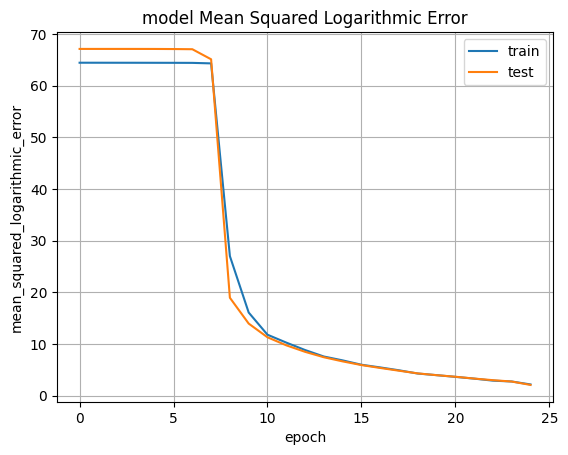

In [ ]:
# summarize history for loss
plt.plot(model_ann2.history['mean_squared_logarithmic_error'])
plt.plot(model_ann2.history['val_mean_squared_logarithmic_error'])
plt.grid()
plt.title('model Mean Squared Logarithmic Error')
plt.ylabel('mean_squared_logarithmic_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
#predict

def makeprediction3_1(index,df):
  result = ann2.predict(df.iloc[index])
  return int(result)

In [ ]:
pd.concat([pd.DataFrame(y_pred2),pd.DataFrame(y_test2)],axis=1)

,0,0
0,1161.813110,5365
1,4506.396973,16171
2,260.208954,795
3,195.716110,750
4,260.208954,800
...,...,...
333,54.688396,65
334,800.964172,2900
335,157.331360,871
336,80.503448,1173


# 성능지표

 인터뷰 "예측인원이 실제 인원의 10% 오차 범위에 있다면 사용할 것 같다"에 기반하여 지표 생성하고자 함.

(1) 선형회귀모델
(2) ANN 모델
: 몇 퍼센트의 성공률을 보이는지


In [ ]:
# makeprediction1의 mse: 496292746911.43994
# makeprediction2의 mse: 123533017.68286735
# makeprediction2_1의 mse: 125290111.47039375
# ANN 1의 mse: 29568733.932251845
# ANN 2의 mse: 487177201.3730714

# mse: ANN1 < makeprediction2 < makeprediction2_1 < ANN 2

In [ ]:
mean_pred = pd.read_csv('/content/drive/MyDrive/DAB/Model /mean_pred.csv', encoding = 'cp949')

In [ ]:
score1_df = pd.concat([pd.DataFrame(df2["EXCCLC_EVENT_NMPR_CO"].iloc[:1686,]),mean_pred],axis=1)
score1_df.columns = ["EXCCLC_EVENT_NMPR_CO","mean_predict"]

In [ ]:
score1_df

,EXCCLC_EVENT_NMPR_CO,mean_predict
0,2000,2000.00
1,300,1150.00
2,1600,1300.00
3,2395,1573.75
4,14153,1573.75
...,...,...
1681,3219,4396.20
1682,4504,5060.60
1683,9493,10036.20
1684,15100,5780.00


In [ ]:
# (df2: 이상치를 고려하지 않은 원래 데이터를 사용하고 변수는 공연장소, 공연유형, 신청인원수, 사용일수, vector3 사용함.)

score2_df = pd.DataFrame([df2_pred["EXCCLC_EVENT_NMPR_CO"],model_pred1.predict(df2_pred[x_cols])],index=["EXCCLC_EVENT_NMPR_CO","makeprediction2"]).transpose()

In [ ]:
score2_df_new = pd.DataFrame([df2_pred_new["EXCCLC_EVENT_NMPR_CO"],model_pred1_new.predict(df2_pred_new[x_cols_new])],index=["EXCCLC_EVENT_NMPR_CO","makeprediction2_new"]).transpose()

In [ ]:
# (df2와 공연장소, 신청인원, vector3_col 사용함.)

score3_df = pd.DataFrame([df2_pred["EXCCLC_EVENT_NMPR_CO"],model_pred2.predict(df2_pred[x_cols])],index=["EXCCLC_EVENT_NMPR_CO","makeprediction2_1"]).transpose()

In [ ]:
# (공연장소, 행사유형, 신청인원, 사용일수, vector3_col)

score4_df = pd.concat([pd.DataFrame(y_1),pd.DataFrame(ann1.predict(X_1))],axis=1)
score4_df.columns = ["test1","pred1"]

53/53 [==============================] - 1s 10ms/step


In [ ]:
# (공연장소, 신청인원, vector3_col)

score5_df = pd.concat([pd.DataFrame(y_2),pd.DataFrame(ann2.predict(X_2))],axis=1)
score5_df.columns = ["test2","pred2"]

53/53 [==============================] - 1s 10ms/step


오차범위계산 함수 (예측 인원이 실제 인원의 10% 오차 범위에 있는지 여부)



In [ ]:
def Error_fun(df,real, predict):
  df["pre_success"] = (df[predict] >= df[real]*0.9) & (df[predict] <= df[real]*1.1)
  return len(df.loc[df["pre_success"] == True])/len(df) # 예측 퍼센트 도출

In [ ]:
Error_fun(score1_df,"EXCCLC_EVENT_NMPR_CO","mean_predict")

0.04863582443653618

In [ ]:
Error_fun(score2_df,"EXCCLC_EVENT_NMPR_CO","makeprediction2")

0.1387900355871886

In [ ]:
# Error_fun(score2_df_new,"EXCCLC_EVENT_NMPR_CO","makeprediction2_new")

0.11387900355871886

In [ ]:
Error_fun(score3_df,"EXCCLC_EVENT_NMPR_CO","makeprediction2_1")

0.1257413997627521

In [ ]:
Error_fun(score4_df,"test1","pred1")

0.06998813760379596

In [ ]:
Error_fun(score5_df,"test2","pred2")

0.005931198102016607